# Домашнее задание №5: Методы создания повторных выборок

## Задание №1

Для выполнения задания используется набор данных `Default`. Для этого необходимо установить пакет `ISLR`.

1. Постройте логистическую регрессионную модель, которая использует `income` и `balance` для предсказания `default`.

In [1]:
install.packages('ISLR')
library(ISLR)
set.seed(1)
glm.fit <- glm(default ~ income + balance, data = Default, family = binomial)
summary(glm.fit)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in install.packages("ISLR"):
“installation of package ‘ISLR’ had non-zero exit status”


ERROR: ignored

2. Применив метод проверочной выборки, оцените частоту ошибок, совершаемых этой моделью. Для этого вы должны выполнить следующие шаги:
  * Разбейте исходные данные на обучающую и проверочную выборки.
  * Подгоните множественную логистическую регрессионную модель, используя только обучающие данные.
  * Получите предсказания неуплаты долга для каждого клиента из проверочной выборки, вычислив апостериорную вероятность дефолта для соответствующего клиента и отнеся его к категории неплательщиков в случае, если эта апостериорная вероятность превышает 0,5.
  * Вычислите частоту ошибок на проверочной выборке, которая представляет собой долю неверно классифицированных наблюдений в проверочной выборке.

In [ ]:
train <- sample(10000,7000)
test <- Default[-train,]
glm.fit <- glm(default ~ income + balance, data = Default, family = binomial, subset = train)
glm.probs <- predict(glm.fit, test, type = "response")
glm.pred <- rep("No", 3000)
glm.pred[glm.probs > .5] <- "Yes"
print(paste("Error rate:", 1-mean(glm.pred == test$default)))

[1] "Error rate: 0.0266666666666666"


3. Повторите процесс из п. 2. три раза, используя разные разбиения наблюдений на обучающую и проверочную выборки. Прокомментируйте полученные результаты.

In [ ]:
train <- sample(10000,7000)
test <- Default[-train,]
glm.fit <- glm(default ~ income + balance, data = Default, family = binomial, subset = train)
glm.probs <- predict(glm.fit, test, type = "response")
glm.pred <- rep("No", 3000)
glm.pred[glm.probs > .5] <- "Yes"
print(paste("Error rate:", 1-mean(glm.pred == test$default)))

[1] "Error rate: 0.028"


In [ ]:
train <- sample(10000,7000)
test <- Default[-train,]
glm.fit <- glm(default ~ income + balance, data = Default, family = binomial, subset = train)
glm.probs <- predict(glm.fit, test, type = "response")
glm.pred <- rep("No", 3000)
glm.pred[glm.probs > .5] <- "Yes"
print(paste("Error rate:", 1-mean(glm.pred == test$default)))

[1] "Error rate: 0.023"


In [ ]:
train <- sample(10000,7000)
test <- Default[-train,]
glm.fit <- glm(default ~ income + balance, data = Default, family = binomial, subset = train)
glm.probs <- predict(glm.fit, test, type = "response")
glm.pred <- rep("No", 3000)
glm.pred[glm.probs > .5] <- "Yes"
print(paste("Error rate:", 1-mean(glm.pred == test$default)))

[1] "Error rate: 0.0276666666666666"


Частота ошибок на проверочной выборке немного изменяется при различных разбиениях на обучающую и тестовую выборки, т.е. точность модели зависит от разбиения выборки.

4. Рассмотрим логистическую регрессионную модель, которая предсказывает вероятность дефолта на основе `income`, `balance` и индикаторной переменной `student`. Оцените частоту ошибок, совершаемых этой моделью на новых данных, используя метод проверочной выборки. Дайте комментарий относительно того, приводит ли включение переменной `student` к снижению частоты ошибок на проверочной выборке.

In [ ]:
train <- sample(10000,7000)
test <- Default[-train,]

glm.fit <- glm(default ~ income + balance, data = Default, family = binomial, subset = train)
glm.probs <- predict(glm.fit, test, type = "response")
glm.pred <- rep("No", 3000)
glm.pred[glm.probs > .5] <- "Yes"
print(paste("Error rate:", 1-mean(glm.pred == test$default)))
summary(glm.fit)

glm.fit <- glm(default ~ income + balance + student, data = Default, family = binomial, subset = train)
glm.probs <- predict(glm.fit, test, type = "response")
glm.pred <- rep("No", 3000)
glm.pred[glm.probs > .5] <- "Yes"
print(paste("Error rate:", 1-mean(glm.pred == test$default)))
summary(glm.fit)

[1] "Error rate: 0.028"



Call:
glm(formula = default ~ income + balance, family = binomial, 
    data = Default, subset = train)

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -1.129e+01  5.129e-01 -22.012  < 2e-16 ***
income       1.582e-05  5.962e-06   2.654  0.00796 ** 
balance      5.560e-03  2.725e-04  20.401  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1969.1  on 6999  degrees of freedom
Residual deviance: 1095.3  on 6997  degrees of freedom
AIC: 1101.3

Number of Fisher Scoring iterations: 8


[1] "Error rate: 0.0273333333333333"



Call:
glm(formula = default ~ income + balance + student, family = binomial, 
    data = Default, subset = train)

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -1.087e+01  5.898e-01 -18.422   <2e-16 ***
income       4.735e-06  9.888e-06   0.479    0.632    
balance      5.613e-03  2.764e-04  20.308   <2e-16 ***
studentYes  -3.978e-01  2.822e-01  -1.410    0.159    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1969.1  on 6999  degrees of freedom
Residual deviance: 1093.3  on 6996  degrees of freedom
AIC: 1101.3

Number of Fisher Scoring iterations: 8


Частота ошибок при включении новой переменной `student` при использовании такой же выборки обучающих и тестовых данных немного уменьшилась. Предиктор `income` становится статистически не значимым, `student` также не является статистически значимым. Однако результат зависит от разбиения выборки.

In [ ]:
train <- sample(10000,7000)
test <- Default[-train,]

glm.fit <- glm(default ~ income + balance, data = Default, family = binomial, subset = train)
glm.probs <- predict(glm.fit, test, type = "response")
glm.pred <- rep("No", 3000)
glm.pred[glm.probs > .5] <- "Yes"
print(paste("Error rate:", 1-mean(glm.pred == test$default)))
summary(glm.fit)

glm.fit <- glm(default ~ income + balance + student, data = Default, family = binomial, subset = train)
glm.probs <- predict(glm.fit, test, type = "response")
glm.pred <- rep("No", 3000)
glm.pred[glm.probs > .5] <- "Yes"
print(paste("Error rate:", 1-mean(glm.pred == test$default)))
summary(glm.fit)

[1] "Error rate: 0.022"



Call:
glm(formula = default ~ income + balance, family = binomial, 
    data = Default, subset = train)

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -1.105e+01  4.859e-01 -22.751  < 2e-16 ***
income       2.085e-05  5.785e-06   3.605 0.000312 ***
balance      5.383e-03  2.550e-04  21.113  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 2084.0  on 6999  degrees of freedom
Residual deviance: 1173.1  on 6997  degrees of freedom
AIC: 1179.1

Number of Fisher Scoring iterations: 8


[1] "Error rate: 0.023"



Call:
glm(formula = default ~ income + balance + student, family = binomial, 
    data = Default, subset = train)

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -1.026e+01  5.490e-01 -18.695  < 2e-16 ***
income      -2.008e-07  9.326e-06  -0.022  0.98283    
balance      5.490e-03  2.609e-04  21.046  < 2e-16 ***
studentYes  -7.786e-01  2.692e-01  -2.893  0.00382 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 2084.0  on 6999  degrees of freedom
Residual deviance: 1164.8  on 6996  degrees of freedom
AIC: 1172.8

Number of Fisher Scoring iterations: 8


Для другого разбиения частота ошибок при включении новой переменной `student` при использовании такой же выборки обучающих и тестовых данных немного увеличилась. Предиктор `income` становится статистически не значимым.

## Задание №2

Для выполнения задания используется набор данных `Default` из пакета `ISLR`.

1. Воспользовавшись функциями `summary()` и `glm()`, определите стандартные ошибки коэффициентов переменных `income` и `balance` из множественной логистической регрессионной модели, которая включает оба предиктора.

In [ ]:
set.seed(2)
glm.fit <- glm(default ~ income + balance, data = Default, family = binomial)
summary(glm.fit)


Call:
glm(formula = default ~ income + balance, family = binomial, 
    data = Default)

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -1.154e+01  4.348e-01 -26.545  < 2e-16 ***
income       2.081e-05  4.985e-06   4.174 2.99e-05 ***
balance      5.647e-03  2.274e-04  24.836  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 2920.6  on 9999  degrees of freedom
Residual deviance: 1579.0  on 9997  degrees of freedom
AIC: 1585

Number of Fisher Scoring iterations: 8


2. Напишите функцию `boot.fn()`, которая принимает таблицу данных `Default` и вектор с индексными номерами наблюдений и возвращает оценки коэффициентов `income` и `balance` из множественной логистической регрессионной модели.

In [ ]:
boot.fn <- function (data, index) {
  subset <- data[index,]
  glm.fit <- glm(default ~ income + balance, data = subset, family = "binomial")
  return(coefficients(glm.fit))
}

3. Примените функцию `boot()` из библиотеки `boot` вместе с Вашей функцией `boot.fn()` для нахождения оценок стандартных ошибок регрессионных коэффициентов `income` и `balance`.

In [ ]:
library(boot)
res <- boot(data = Default, statistic = boot.fn, R = 1000)
print(res)
se_income <- sd(res$t[, 2])
se_balance <- sd(res$t[, 3])
print(paste("Standard Error for income: ", se_income))
print(paste("Standard Error for balance: ", se_balance))


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = Default, statistic = boot.fn, R = 1000)


Bootstrap Statistics :
         original        bias     std. error
t1* -1.154047e+01 -3.956457e-02 4.228903e-01
t2*  2.080898e-05 -4.605498e-07 4.924565e-06
t3*  5.647103e-03  3.048004e-05 2.228767e-04
[1] "Standard Error for income:  4.92456491626933e-06"
[1] "Standard Error for balance:  0.000222876685690302"


4. Прокомментируйте величины стандартных ошибок, полученных при помощи функции `glm()` и Вашей бутстреп-функции.

|  | glm | boot |
|---|---|---|
| income | 4.985e-06 | 4.924565e-06 |
| balance | 2.274e-04 | 2.228767e-04 |

Значения стандартных ошибок, полученные при помощи `boot`, немного меньше полученных при помощи `glm`.

## Задание №3

1. Создайте набор имитированных данных следующим образом:

In [2]:
set.seed(2023)

x <- rnorm(100)
y <- x - 2 * x ^ 2 + rnorm(100)

In [3]:
model <- glm(y ~ x)
summary(model)


Call:
glm(formula = y ~ x)

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -1.7158     0.2755  -6.229 1.18e-08 ***
x             0.4447     0.2781   1.599    0.113    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for gaussian family taken to be 7.552032)

    Null deviance: 759.41  on 99  degrees of freedom
Residual deviance: 740.10  on 98  degrees of freedom
AIC: 489.95

Number of Fisher Scoring iterations: 2


Что в этом наборе данных $ n $, а что — $ p $? Запишите модель, породившую эти данные, в виде уравнения.

В созданном наборе имитированных данных:
*   `n = 100` - объем выборки
*   `p = 2` - число параметров регрессии

Уравнение модели, порождающей эти данные:
$$ y = x - 2x^2 + ε $$



2. Постройте график зависимости $ Y $ от $ X $. Прокомментируйте, что вы видите.

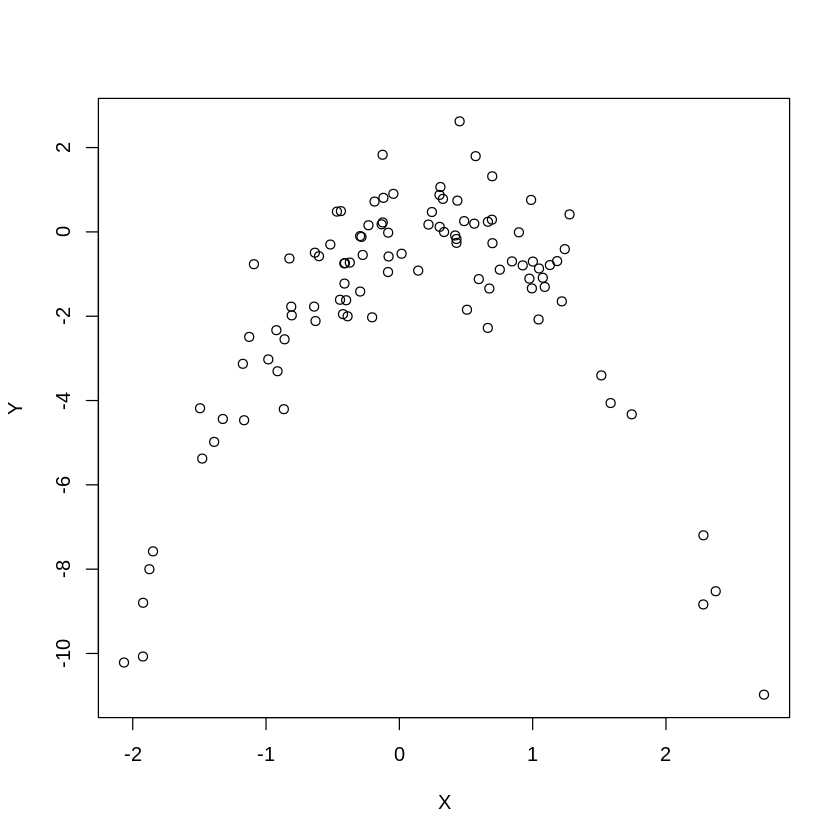

In [ ]:
plot(x, y, xlab = "X", ylab = "Y")

Скатерограмма отражает квадратичную зависимость между `Y` и `X`.

3. Задайте зерно генератора случайных чисел и вычислите LOOCV-ошибки предсказаний, возникающие в результате подгонки следующих четырех моделей по методу наименьших квадратов:
  * $ Y = \beta_0 + \beta_1X + \varepsilon $
  * $ Y = \beta_0 + \beta_1X + \beta_2X^2 + \varepsilon $
  * $ Y = \beta_0 + \beta_1X + \beta_2X^2 + \beta_3X^3 + \varepsilon $
  * $ Y = \beta_0 + \beta_1X + \beta_2X^2 + \beta_3X^3 + \beta_4X^4 + \varepsilon $
  
_**Обратите внимание:** для создания единой таблицы данных, содержащей $ X $ и $ Y $, полезной может оказаться функция_ `data.frame()`.

In [ ]:
set.seed(2023)
errors <- rep(0, 4)
Data <- data.frame(x, y)
fit.glm.1 <- glm(y ~ x)
errors[1] <- cv.glm(Data, fit.glm.1)$delta[1]
fit.glm.2 <- glm(y ~ poly(x, 2))
errors[2] <- cv.glm(Data, fit.glm.2)$delta[1]
fit.glm.3 <- glm(y ~ poly(x, 3))
errors[3] <- cv.glm(Data, fit.glm.3)$delta[1]
fit.glm.4 <- glm(y ~ poly(x, 4))
errors[4] <- cv.glm(Data, fit.glm.4)$delta[1]
df <- data.frame(Degree = 1:4, LOOCV_Error = errors)
df

Degree,LOOCV_Error
<int>,<dbl>
1,8.1612618
2,0.8943245
3,0.9136646
4,0.9563156


4. Повторите п. 3, применив другой СИД в функции `set.seed()`, и опишите свои результаты. Похожи ли эти результаты на то, что вы получили в п. 3? Почему?

In [ ]:
set.seed(1337)
errors <- rep(0, 4)
Data <- data.frame(x, y)
fit.glm.1 <- glm(y ~ x)
errors[1] <- cv.glm(Data, fit.glm.1)$delta[1]
fit.glm.2 <- glm(y ~ poly(x, 2))
errors[2] <- cv.glm(Data, fit.glm.2)$delta[1]
fit.glm.3 <- glm(y ~ poly(x, 3))
errors[3] <- cv.glm(Data, fit.glm.3)$delta[1]
fit.glm.4 <- glm(y ~ poly(x, 4))
errors[4] <- cv.glm(Data, fit.glm.4)$delta[1]
df <- data.frame(Degree = 1:4, LOOCV_Error = errors)
df

Degree,LOOCV_Error
<int>,<dbl>
1,8.1612618
2,0.8943245
3,0.9136646
4,0.9563156


Результаты индентичны т.к. LOOCV использует среднее значение MSE предсказаний каждого из объектов выборки, соответственно не зависит от качества разбиения, как обычная кросс-валидация.

Наименьшая ошибка предсказаний LOOCV достигается при полиноме 2 степени, что соответствует скатерограмме с квадратичной зависимостью `Y` от `X`.

6. Дайте комментарии в отношении статистической значимости оценок коэффициентов, полученных для каждой модели в п. 3 методом наименьших квадратов. Согласуются ли эти результаты с выводами, сделанными на основе результатов перекрестной проверки?

In [ ]:
summary(fit.glm.4)


Call:
glm(formula = y ~ poly(x, 4))

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -1.68575    0.09446 -17.846  < 2e-16 ***
poly(x, 4)1   4.39415    0.94461   4.652 1.06e-05 ***
poly(x, 4)2 -25.59729    0.94461 -27.098  < 2e-16 ***
poly(x, 4)3  -0.19822    0.94461  -0.210    0.834    
poly(x, 4)4  -0.26809    0.94461  -0.284    0.777    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for gaussian family taken to be 0.8922809)

    Null deviance: 759.408  on 99  degrees of freedom
Residual deviance:  84.767  on 95  degrees of freedom
AIC: 279.26

Number of Fisher Scoring iterations: 2


Статистически значимыми являются линейный и квадратичный члены, что полностью согласуется с выводами сделаными на основе перекрестной проверки.
